In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from openqaoa.qaoa_parameters import QAOACircuitParams, create_qaoa_variational_params, Hamiltonian
from openqaoa.devices import create_device
from openqaoa.backends.qaoa_backend import get_qaoa_backend
from openqaoa.optimizers import get_optimizer
from openqaoa.utilities import *
from openqaoa.workflows.optimizer import QAOA, RQAOA
from openqaoa.problems.problem import QUBO, MaximumCut, MinimumVertexCover

### MaxCut

Graph edges [(0, 7), (0, 4), (0, 6), (7, 3), (7, 1), (1, 2), (1, 4), (2, 3), (2, 5), (4, 6), (3, 5), (6, 5)]
after plot graph [(0, 7), (0, 4), (0, 6), (7, 3), (7, 1), (1, 2), (1, 4), (2, 3), (2, 5), (4, 6), (3, 5), (6, 5)]
QUBO terms [[0, 1], [0, 4], [0, 6], [1, 5], [1, 2], [2, 3], [2, 4], [3, 5], [3, 7], [4, 6], [5, 7], [6, 7]]
after maxcut prob init [(0, 1), (0, 4), (0, 6), (1, 5), (1, 2), (2, 3), (2, 4), (3, 5), (3, 7), (4, 6), (5, 7), (6, 7)]
Hamiltonian from graph 0.533*Z_{0}Z_{7} + 0.681*Z_{0}Z_{4} + 0.755*Z_{0}Z_{6} + 0.964*Z_{3}Z_{7} + 0.837*Z_{1}Z_{7} + 0.016*Z_{1}Z_{2} + 0.89*Z_{1}Z_{4} + 0.364*Z_{2}Z_{3} + 0.998*Z_{2}Z_{5} + 0.327*Z_{4}Z_{6} + 0.745*Z_{3}Z_{5} + 0.076*Z_{5}Z_{6} + 0
Hamiltonian from QUBO 0.533*Z_{0}Z_{1} + 0.681*Z_{0}Z_{4} + 0.755*Z_{0}Z_{6} + 0.964*Z_{1}Z_{5} + 0.837*Z_{1}Z_{2} + 0.016*Z_{2}Z_{3} + 0.89*Z_{2}Z_{4} + 0.364*Z_{3}Z_{5} + 0.998*Z_{3}Z_{7} + 0.327*Z_{4}Z_{6} + 0.745*Z_{5}Z_{7} + 0.076*Z_{6}Z_{7} + 0


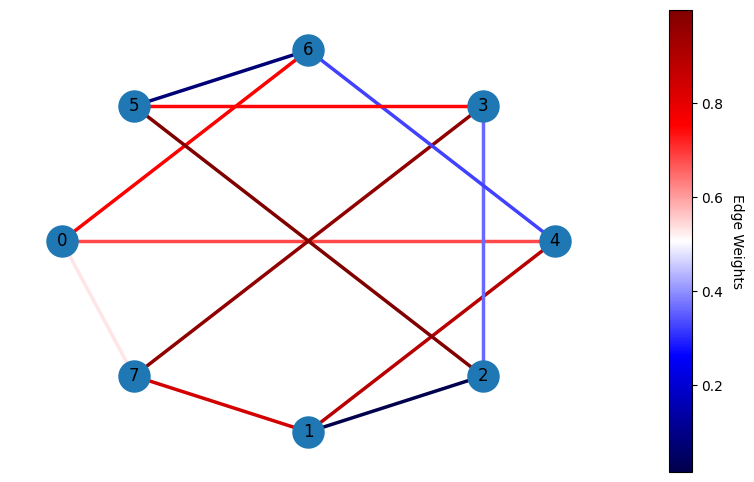

In [3]:
g = random_k_regular_graph(degree=3, nodes=range(8), weighted=True, biases=True)
print('Graph edges', g.edges)
plot_graph(g)
#plt.savefig("graph_sigma={}.png".format(sigma))
#plt.clf()
print('after plot graph',g.edges)
# Define te problem and translate it into a binary Qubo.
maxcut_prob = MaximumCut(g)
maxcut_qubo = maxcut_prob.get_qubo_problem()
print("QUBO terms", maxcut_qubo.terms)
print('after maxcut prob init',maxcut_prob.G.edges)

# Define Hamiltonian
cost_hamiltonian = hamiltonian_from_graph(g)
print('Hamiltonian from graph', cost_hamiltonian)
print(energy, configuration)

# Solve the problem analytically
energy, configuration = ground_state_hamiltonian(cost_hamiltonian)

print('Hamiltonian from QUBO', maxcut_qubo.hamiltonian)
print(energy, configuration)


In [ ]:
terms = []
weights = []

for u, v, edge_weight in g.edges(data="weight"):
    terms.append([u, v])

    # We expect the edge weight to be given in the attribute called
    # "weight". If it is None, assume a weight of 1.0
    weights.append(
        edge_weight if edge_weight else 1
    )

In [ ]:
q= QUBO(g.number_of_nodes(), terms, weights)

In [ ]:
q.terms

### Minimum Vertex Cover

In [ ]:
g = random_k_regular_graph(degree=3, nodes=range(6), weighted=False, biases=False)
plot_graph(g)
#plt.savefig("graph_sigma={}.png".format(sigma))
#plt.clf()

# Define te problem and translate it into a binary Qubo.

vc = MinimumVertexCover(G,field = field,penalty = penalty).get_qubo_problem()
print(vc.terms)

# Define Hamiltonian
cost_hamiltonian = hamiltonian_from_graph(g)
print(cost_hamiltonian)


# Solve the problem analytically
energy, configuration = ground_state_hamiltonian(cost_hamiltonian)
